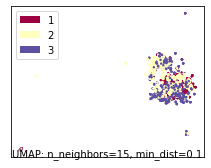

In [27]:
##main - extract from DB
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pyodbc
import json
import re
import pandas as pd
from sklearn.model_selection import train_test_split
from jsonmerge import merge
from datetime import datetime
from num2words import num2words
import pickle
import numpy as np
import scipy.sparse
import sympy
import sklearn.datasets
import sklearn.feature_extraction.text
import umap
import umap.plot
import matplotlib.pyplot as plt
%matplotlib inline

server_p = 'sqlehqraiqhpoc.database.windows.net'

database = 'TempData'
driver = '{ODBC Driver 17 for SQL Server}'
#table_name='ESI_LOG'
owner ='dbo'

conn = pyodbc.connect('DRIVER='+driver+';SERVER='+server_p+
                      ';PORT=1433;DATABASE='+database+';Authentication=ActiveDirectoryInteractive;UID=a-weeck@health.qld.gov.au')         
#sql_0 = pd.read_sql_query('''SELECT Referral_Category, icd10list FROM vw_referral where referral_category = 1''',conn)
sql_0 = pd.read_sql_query('''SELECT Referral_Category, icd10list FROM vw_referral''',conn)
df = pd.DataFrame(sql_0, columns=['Referral_Category','icd10list'])

####################
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
X = df['icd10list'].values
y = df['Referral_Category'].values
#y = [num2words(i) for i in y]

vectorize_x = CountVectorizer()
vectorize_x.fit(X)
X_matrix = vectorize_x.transform(X)

# vectorize_y = CountVectorizer() 
# vectorize_y.fit(y)
# y_matrix= vectorize_y.transform(y)


#%%time
#mapper = umap.UMAP(metric='cosine', random_state=42, low_memory=True).fit(X_matrix)
# umap.plot.points(mapper ,labels=y, width=500, height=500)
mapper = umap.UMAP().fit(X_matrix)
umap.plot.points(mapper, labels=y, width=250, height=200)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


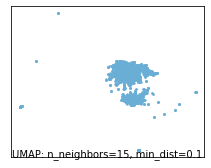

In [29]:
mapper = umap.UMAP().fit(X_matrix)
#umap.plot.points(mapper,theme='viridis')
ax= umap.plot.points(mapper,background='white', width=250, height=200)
#ax.set_xlabel("x label")
#ax.set_ylabel("y label")
#plt.title('UMAP for referral cat 1');

outlier_scores = sklearn.neighbors.LocalOutlierFactor(contamination=0.005).fit_predict(mapper.embedding_)

In [22]:
outlying_digits = X_matrix[outlier_scores == -1]
print(vectorize_x.inverse_transform(outlying_digits))

[array(['d68_2', 'e23_7', 'f60_3', 'h66_91', 'i13_10', 'j01_20', 'j32_0',
       'j32_9', 'j34_89', 'j90', 'k13_70', 'k56_609', 'k63_89', 'm41_9',
       'm79_89', 'r09_89', 'r22_1', 'r29_2', 't88_7', 'z86_73'],
      dtype='<U8'), array(['e55_9', 'f41_0', 'f41_9', 'i70_0', 'j32_9', 'j34_89', 'j44_9',
       'l29_9', 'm41_9', 'm70_4', 'r05', 'r09_82', 'r18_8', 'r21', 'r52',
       'r93_0'], dtype='<U8'), array(['d68_2', 'e23_7', 'f60_3', 'h66_90', 'i13_10', 'j01_20', 'j32_0',
       'j32_9', 'j34_89', 'j90', 'k13_70', 'k56_609', 'k63_89', 'm41_9',
       'm79_89', 'r09_89', 'r22_1', 'r29_2', 't88_7', 'z86_73'],
      dtype='<U8'), array(['e55_9', 'f41_0', 'f41_9', 'j44_9', 'l29_9', 'm70_4', 'm70_6',
       'r05', 'r10_819', 'r20_8', 'r21', 'r25_2', 'r52'], dtype='<U8'), array(['e55_9', 'f41_0', 'f41_9', 'j44_9', 'l29_9', 'm70_4', 'm70_6',
       'r05', 'r10_819', 'r20_8', 'r21', 'r25_2', 'r52'], dtype='<U8'), array(['d68_2', 'e23_7', 'f60_3', 'h66_90', 'i13_10', 'j01_20', 'j32_0',
    

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

aa=[]
for i in X:
    #ii='\''+i.replace(', ','\',\'')+'\''
    aa.append(list(i.replace(' ','').split(',')))

dataset=aa
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets=apriori(df, min_support=0.01, use_colnames=True)
display(frequent_itemsets)
rules = association_rules(frequent_itemsets,metric="lift")
rules[ (rules['lift'] >= 40) & (rules['confidence'] >= 1.0) ]
confid_itemsets=rules.sort_values(by=['lift'])
confid_itemsets

In [88]:
import icd10

print ('E53.8 -',		icd10.find('E53.8').description)
print ('G45.9 -',		icd10.find('G45.9').description)
print ('G47.9 -',		icd10.find('G47.9').description)
print ('H66.90-',		icd10.find('H66.90').description)
print ('H91.90-',		icd10.find('H91.90').description)
print ('G47.9 -',		icd10.find('G47.9').description)
print ('D80.3 -',		icd10.find('D80.3').description)
print ('E53.8 -',		icd10.find('E53.8').description)
print ('G45.9 -',		icd10.find('G45.9').description)

E53.8 - Deficiency of other specified B group vitamins
G45.9 - Transient cerebral ischemic attack, unspecified
G47.9 - Sleep disorder, unspecified
H66.90- Otitis media, unspecified, unspecified ear
H91.90- Unspecified hearing loss, unspecified ear
G47.9 - Sleep disorder, unspecified
D80.3 - Selective deficiency of immunoglobulin G [IgG] subclasses
E53.8 - Deficiency of other specified B group vitamins
G45.9 - Transient cerebral ischemic attack, unspecified


In [ ]:
support=rules[['support']].values
confidence=rules[['confidence']].values
#confidence=rules.as_matrix(columns=['confidence'])
#coords = rules[["support", "confidence"]].values

import random
import matplotlib.pyplot as plt
 
for i in range (len(support)):
   support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5) 
   confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)
 
plt.scatter(support, confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [ ]:
# pd.set_option('display.max_columns', None)  
# pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', -1)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets


In [ ]:
import matplotlib 
import squarify

transactions = pd.DataFrame(te_ary, columns=te.columns_)
pf = transactions.describe()
f = pf.iloc[0]-pf.iloc[3]
a = f.tolist()
b = list(f.index)
item = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item = item.sort_values(['Count'], ascending=False).head(40)
transactions


fig, ax = plt.subplots()
cmap = matplotlib.cm.coolwarm

mini = min(item["Count"])
maxi = max(item["Count"])

norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in item["Count"]]

squarify.plot(sizes=item["Count"], label=item["Item"], alpha=0.8, color=colors)
plt.axis('off')
plt.title("Top 40 Frequent ICD10 Items", fontsize=10)
ttl = ax.title
ttl.set_position([.5, 1.05])

In [ ]:
#item

rules['lhs items'] = rules['antecedents'].apply(lambda x:len(x) )
rules[rules['lhs items']>1].sort_values('lift', ascending=False).head()
import matplotlib.pyplot as plt
import seaborn as sns
# Replace frozen sets with strings
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules[rules['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')
# Generate a heatmap with annotations on and the colorbar off
plt.figure(figsize = (15,5))
sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [ ]:
import icd10
print(icd10.find('R59.0').description)
print(icd10.find('J43.9').description)


In [ ]:
import icd10
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

def icd_decode(x):
    icd_code=x.replace('_','.').replace(' ','')
    code = icd10.find(icd_code)
    return code.description


for i in frequent_itemsets.iterrows():
    icdlist0=[]
    icdlist1=[]
    for k in list(i[1][1]):
        icdlist0.append(icd_decode(k))
    print(icdlist0)

In [ ]:
confid_itemsets
for i in confid_itemsets.iterrows():
    antecedents=[]
    consequents=[]
    for j in list(i[1][0]):
       antecedents.append(icd_decode(j))
    for k in list(i[1][1]):
        consequents.append(icd_decode(k))
        
    print(antecedents,'*****',consequents)


In [1]:
import numpy as np
import scipy.sparse
import sympy
import sklearn.datasets
import sklearn.feature_extraction.text
import umap
import umap.plot
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
%%time
mapper = umap.UMAP(metric='cosine', random_state=42, low_memory=True).fit(X_train)

C:\Users\Weeck\AppData\Roaming\Python\Python37\site-packages\umap_learn-0.5.0-py3.7.egg\umap\umap_.py:126: UserWarning: A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.
Disconnection_distance = 1 has removed 442644 edges.
It has only fully disconnected 4 vertices.
Use umap.utils.disconnected_vertices() to identify them.
  f"A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.\n"


Wall time: 6.29 s


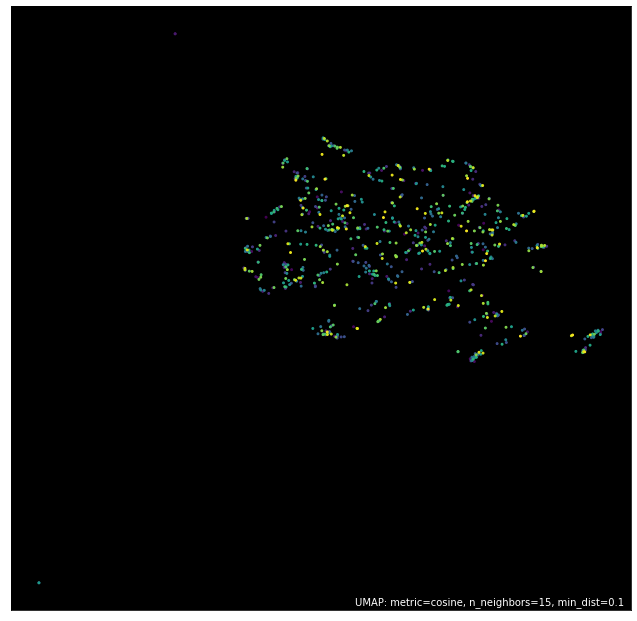

In [8]:
umap.plot.points(mapper, values=np.arange(765), theme='viridis')

In [5]:
X_train.shape

(765, 992)